## メモ

機械学習はデータの背景のパターン、構造を見つけ出す  
データの構造を把握できないことが前提、できたらハードコードすれば良い
データを何らかの形で入力して学習させよう→データをベクトルにする（このデータの作り方も大事、無意味なデータや偽相関に左右される）  
データの類似性を内積で見るsim(x,y)

線形回帰  
データが大きくなると逆行列の計算が大変、推定量を少しずつ更新することで逆行列がいらない（勾配法）

ロジスティック関数  
確率の場合の損失関数間違った時に大きくなって正解でゼロになるならなんでもよい  
クロスエントロピー

機械学習では  
train dev testにに分ける  
hold-out testを使わない時はn-foldingsを使う  
データが小さすぎるときは一つ抜き交差確認（leave -one-out cross-validation）を使う  

precison recall F1

## k−NN を使った手書き文字認識  

ある点の近傍に最も多いデータを正解値とする

### MNIST Data のダウンロード

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")

In [4]:
X, y = shuffle(mnist.data, mnist.target)
X = X / 255.0
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, dev_X , train_y, dev_y = train_test_split(train_X, train_y, test_size=0.2)
print(len(train_X))
print(len(dev_X))
print(len(train_y))
print(len(dev_y))

44800
11200
44800
11200


テストデータ


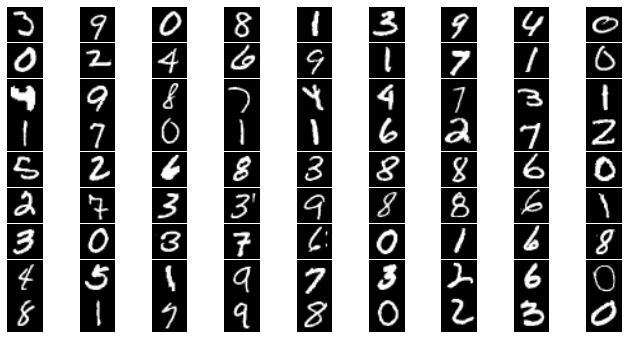

In [5]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
print ("テストデータ")
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28,28)), cmap='gray')

### Cosine 類似度(内積/ノルム)

In [7]:
norm = numpy.linalg.norm(train_X, ord=2, axis=1)
normalized_train_X = train_X / norm[:,numpy.newaxis]

In [8]:
sample_1 = normalized_train_X[0]
sample_2 = normalized_train_X[1]
print(numpy.dot(sample_1, sample_2))

0.234434289715


### k-NN でテストデータに対する予測

In [9]:
# 必要なもの読み込み
import collections


"""
関数の定義
ここから
"""

def est_type(k, sample, teacher, y):

    train_y = y
    score =[]
    for train_instance_x in teacher:
        score.append(numpy.dot(train_instance_x, sample))
    most_similar = sorted([ (s, l) for s, l in zip(score, train_y)], reverse = True)
#     print most_similar[:k]
    type = []
    for i in most_similar[:k]:
        type.append(i[1])
    #同順位の場合は無視してcountersが最初に選んだものを採用
    est_type = collections.Counter(type).most_common(1)[0][0]
    return est_type

def forall(k, dev, teacher,y):
    ans = []
    i=0
    for sample in dev:

        est = est_type(k, sample, teacher,y)
        ans.append(est)
        i += 1

    print("repeated", i)
    return ans

"""ここまで"""
norm = numpy.linalg.norm(train_X, ord=2, axis=1)
train_X = train_X / norm[:,numpy.newaxis]
norm = numpy.linalg.norm(test_X, ord=2, axis=1)
test_X = test_X / norm[:,numpy.newaxis]
pred_y = forall(80, test_X ,train_X, train_y)



repeated 14000


In [11]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y))#, target_names=target_names))

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96      1466
        1.0       0.94      0.99      0.96      1555
        2.0       0.98      0.93      0.96      1427
        3.0       0.95      0.95      0.95      1395
        4.0       0.98      0.92      0.95      1332
        5.0       0.98      0.92      0.95      1280
        6.0       0.95      0.97      0.96      1364
        7.0       0.97      0.94      0.95      1482
        8.0       0.95      0.93      0.94      1338
        9.0       0.88      0.95      0.91      1361

avg / total       0.95      0.95      0.95     14000

